# Analítica y Ciencia de Datos

## CIDE - Otoño 2015

### Modelos lineales de regresión

# Referencias:

Las propiedades y supuestos detrás del Modelo Lineal de Regresión, la pueden encontrar en [Greene, "Econometric Analysis"](http://pages.stern.nyu.edu/~wgreene/Text/econometricanalysis.htm).

También véanse los capítulos 3 y 6 de [ISL](http://www-bcf.usc.edu/~gareth/ISL/getbook.html).

O el capítulo 3 de [ESL](http://statweb.stanford.edu/~tibs/ElemStatLearn/)

# Mínimos Cuadrados Ordinarios (OLS)

* Sean $y_{N \times 1}$, y $X_{N\times (p+1)}$ las variables dependiente y matriz de regresores, respectivamente, donde $X$ incluye $p$ regresores y un vector de unos.


* El modelo lineal es 

$$
\begin{eqnarray}
y &=& X\beta + \epsilon\\
\end{eqnarray}
$$


* El estimador de OLS es el vector $\hat{\beta}$ que minimiza la *suma de residuos al cuadrado* (SSR):

$$
\min_{\beta} SSR(\beta) = (y-X\beta)'(y-X\beta)
$$


* La solución se encuentra fácilmente:
$$
\hat{\beta} = (X'X)^{-1}X'y
$$

y la matriz de varianzas y covarianzas es:

$$
\Sigma_{\beta} = \hat{\sigma}^2(X'X)^{-1}
$$

donde $\hat{\sigma}^2$ es la varianza residual estimada.

# Algunas propiedades del estimador de OLS

*  **Prop 1: El estimador OLS es insesgado**:

$$
E(\hat{\beta}) = \beta
$$

(qué supuestos hay que hacer para probarlo?)

*  **Prop 2: Teorema de Gauss-Markov**:
> El estimador OLS es el estimador de menor varianza, dentro de la clase de estimadores lineales insesgados.

*  **Prop 3: Los residuos estimados son ortogonales a la matriz de regresores:**

$$
X'e = 0
$$

(¿por qué?)



# Propiedades (cont)


*  **Prop 4: Teorema de Frisch-Waugh-Lovell**

> En una regresión con dos variables $y = \alpha_0 + \alpha_1 x_1 + \alpha_2 x_2 + \epsilon$, el estimador del coeficiente $\alpha_i$ se puede obtener en un proceso de dos etapas:

> **Etapa 1**: Obtenga los residuos de una regresión de $y$ sobre $x_{-i}$, $r_{y,-i}$, y de una regresión de $x_i$ sobre $x_{-i}$, $r_{x_i, -i}$

> **Etapa 2**: en la regresión $r_{y,-i} =  \eta_0 + \eta_1 r_{x_i, -i}$, el estimador OLS 
$$\hat{\eta}_1 = \hat{\alpha}_i$$

El Teorema de FWL es más general que en este caso de dos variables (ver Greene, por ejemplo), y es muy útil para entender qué sucede en OLS: cada coeficiente estimado es el efecto *neto* de los otros efectos.  Este proceso de *neteo* o *partialling out*, limpia la estimación de cualquier efecto compartido


# Primera versión de un algoritmo de Backfitting

* El Teorema de FWL nos dice que cada coeficiente se obtiene limpiando $y$ y $x_k$ de los demás regresores $x_{-k}$, y haciendo una regresión entre los residuales correspondientes.


* En la práctica uno no desea hacer esto: para cada coeficiente $\beta_k$ hay que hacer 3 regresiones!


* Pero nos agudiza la intuición.


* Además nos permite introducir una primera versión de un algoritmo de **backfitting** que tiene varias ventajas:

    1. Sirve para entender el algoritmo de backfitting que vamos a utilizar más adelante para estimar modelos aditivos generalizados (Generalized Additive Models, o GAMs).
    
    2. Tiene varios parecidos con algoritmos que no vamos a ver en este curso como el *Gibbs Sampler* utilizado en estadística bayesiana, y el *EM* o *expectation-maximization*.
    
    3. Incluso cuando $p>>N$, podemos estimar los coeficientes, es decir, incluso cuando tenemos más variables explicativas que obsevaciones, porque utiliza regresiones bivariadas únicamente.
    
* El pseudocódigo sigue a continuación, y en la tarea tendrán que mostrar que funciona.

# Pseudocódigo del algoritmo de backfitting para OLS

```
Inicialícese: beta_0 = 0
Inicialícese la distancia: dist = 1

while dist>0.001:
    # En cada iteracción se hacen P+1 regresión bivariadas:
    for k in range(nvars):
        # seleccionemos las P columnas excluyendo la k-ésima
        ind_col = cols/k
        xmat_k = x[ind_col]
        beta_k = beta_actual[ind_col]
        # limpiemos y de los efectos de estas P variables seleccionadas
        y_k = y - xmat_k*beta_k
        # La actual columna es
        x_k = x[k]
        # regresión entre y_k y x_k, y actualizamos este coeficiente:
        beta_actual[k] = ols(y_k, x_k)
    # Actualícese la distancia:
    dist = dist(beta_actual,beta_anterior)
```

# Pseudocódigo: Backfitting:

Denotemos a la estimación de la $k-ésima$ iteración como $\hat{\beta}_{(k)}$, un vector con $p+1$ elementos (uno por cada regresor, y la constante).

1. Inicializamos los parámetros a 0: ${\hat{\beta}_{(0)}} = 0$

2. Vamos a actualizar las estimaciones hasta que las estimaciones no varíen mucho entre sí, es decir, hasta que
$$
\text{distancia}(\hat{\beta}_{(k)},\hat{\beta}_{(k-1)}) < \text{epsilon}
$$

3. Cada iteración consta de $P+1$ estimaciones bivariadas donde:
    
    a. Excluimos al regresor $i$: $x_{-i} = [x_0, x_1, \cdots, x_{i-1}, x_{i+1}, \cdots, x_p]$, y el correspondiente vector ols actual $\hat{\beta}_{(k),-i}$.
    
    b. "Limpiamos" la variable dependiente de los demás regresores, utilizando los coeficientes actuales:

$$
r_{(k),-i} = y - x_{-i} \hat{\beta}_{(k),-i}
$$

    c. Actualizamos el coeficiente actual con la estimación (bivariada) de: 
$$
r_{(k),-i} = \beta_{(k+1),i} x_i + \eta
$$

# En la tarea les voy a pedir que programen el algoritmo y lleguen a algo como esto:


![caption](figures/backfitting.png)

# Variables Dummy y No Linealidad:

* Consideremos un modelo con una variable dummy como regresor:

$$
y_i  = \alpha + \beta D_i + \epsilon_i
$$

con $D_i = 1$ si individuo $i$ pertenece al grupo, y $D_i = 0$ si no pertenece.


* Es inmediato mostrar que:

$$
\beta = E(y_i|D_i = 1) - E(y_i|D_i = 0)
$$

así que la contraparte muestral es 

$$
\hat{\beta} = \overline{y}_1 - \overline{y}_0 
$$
donde $\overline{y}_i = \frac{1}{N_i}\sum_{i \in \{1,0\}} y_i $, y $N_i$ el número de observaciones en el grupo $i$.



# Las variables dummies nos permiten modelar relaciones no lineales

* Por ejemplo, supongamos que queremos modelar la rentabilidad de un cliente en función de su antigüedad.

* Qué alternativas tenemos?

    1. **Modelo lineal**: 
    $$
    r_i = \alpha_0 + \alpha_1 a_i + \epsilon_i
    $$

    2. **Modelo cuadrático**: 
    $$
    r_i = \alpha_0 + \alpha_1 a_i + \alpha_2 a_i^2 +\epsilon_i
    $$

    3. **Modelo polinomial de orden $K$**: 
    $$
    r_i = \sum_{k=0}^K \alpha_k a_i^k +\epsilon_i
    $$


* Alternativamente, podemos dividir el rango de antigüedad and percentiles 
$$
r_i = \sum_{q= 0}^Q \alpha_q D_{qi} + \epsilon_i
$$
con 
$$
D_{qi} = 
\begin{cases}
1 & \text{si $a_i \in [p_{q-1}(a), p_q(a)]$}\\
0 & \text{en otro caso}
\end{cases}
$$

* Si hacemos un grid de percentiles lo suficientemente denso, podremos aproximar cualquier función, así que este método es muy flexible.

# Expansiones polinomiales:

* Como vimos en la diapositiva anterior, un método no paramétrico consiste en aproximar la función $f(X)$ por medio de una expansión por polinomios.


* Por ejemplo, si tenemos tres variables $x_1, x_2, x_3$, una expansión polinomial posible es:

$$
y = \alpha_0 + \sum_{k=1}^3 \beta_k x_k + \sum_{k=1}^3 \theta_k x_k^2 + \sum_{i\neq j} \eta_{ij} x_i x_j + \epsilon_i
$$


* La aproximación puede utilizar polinomios e interacciones de distintos órdenes, y los parámetros se pueden estimar por OLS sin problema, mientras que el número de términos incluido sea menor que el número de observaciones $N>p$.

# Selección de variables


* En general no sabemos cuáles variables deben ir incluidas en un análisis, y este problema puede ser importante cuando tenemos muchos regresores $p$.


* Hay varios métodos de selección de variables que permiten:

    1. **Mejorar la predicción:** por ejemplo, porque un estimador tiene poco sesgo pero mucha varianza.
    
    2. **Facilitar la interpretación:** al eliminar ciertas variables podemos concentrarnos únicamente en las más importantes.
    
 
* Hay tres familias de métodos que se pueden utilizar:

    1. Selección de subconjuntos de variables
    
    2. Regularización o reducción de la magnitud de los coeficientes o *shrinkage*
    
    3. Reducción de dimensionalidad




# Selección de subconjuntos: *Best Subset Selection*

* Si tenemos $p$ regresores, queremos estimar las $\binom{p}{k}$ posibles combinaciones de subconjuntos de $k$ variables.


* Es un método exhaustivo que puede ser computacionalmente ineficientes cuando $p$ es grande.


* Veamos cómo funciona este método utilizando los datos de tarjeta de crédito que están disponibles en la página de [ISL](http://www-bcf.usc.edu/~gareth/ISL/data.html).


* Los datos incluyen el saldo en tarjeta de crédito (balance), el ingreso (Income) y límite de crédito  (Limit), score crediticio (Rating), número de tarjetas (Cards), edad, educación, género, variable indicadora del estatus de estudiante del cliente, casado, y etnicidad, para 400 clientes.


* Queremos estimar el efecto que tienen estos regresores sobre el saldo o balance de cada cliente.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('datasets/Credit.csv')
data.head(5)

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [2]:
# primero organicemos los datos: las variables cuantitativas están bien.  Las cualitativas toca transformarlas
N = data.shape[0]
dum_hombre     = np.asarray(data.Gender == ' Male').reshape((N,1))
dum_estudiante = np.asarray(data.Student == 'Yes').reshape((N,1))
dum_casado     = np.asarray(data.Married == 'Yes').reshape((N,1))
# Para etnicidad debemos excluir una variable que sirva como referencia:
# tenemos tres categorías: vamos a excluir la tercera: "African American"
print data.Ethnicity.unique()
dum_ethnic = np.asarray(pd.get_dummies(data.Ethnicity).iloc[:,:-1])
# etiquetas de X
labs_x = np.array(['Rating','Income','Limit','Cards','Age','Education',
              'Hombre','Estudiante','Casado','Caucasian','Asian'])
# incluyamos todas las variables:
prexmat = np.concatenate((
                        np.asarray(data.Rating).reshape((N,1)),
                        np.asarray(data.Income).reshape((N,1)),
                         np.asarray(data.Limit).reshape((N,1)),
                         np.asarray(data.Cards).reshape((N,1)),
                         np.asarray(data.Age).reshape((N,1)),
                         np.asarray(data.Education).reshape((N,1)),
                          dum_hombre, dum_estudiante, dum_casado, dum_ethnic
                         ),axis=1)
saldo = np.asarray(data.Balance).reshape((N,1))
print prexmat.shape
# revisemos que todo quedó bien:
pd.DataFrame(prexmat).mean()

['Caucasian' 'Asian' 'African American']
(400, 11)


0      354.940000
1       45.218885
2     4735.600000
3        2.957500
4       55.667500
5       13.450000
6        0.482500
7        0.100000
8        0.612500
9        0.247500
10       0.255000
dtype: float64

In [100]:
# Para las posibles combinaciones vamos a usar el módulo itertools
from itertools import combinations
import sys
sys.path.append('/Users/danielvaughan/Documents/Python Scripts')
import olsdan as ols

# probémoslo con conjuntos de 9 elementos
list(combinations(np.arange(10),9))

# vamos a guardar los resultados en un array, pero no se cuántas filas tenemos
res_arr = np.zeros((1,6))
res_arr[:,:] = np.nan
# necesito una lista con todas las combinaciones.  La voy a guardar en un DF
initsub = np.zeros((0,9))
initsub[:] = np.nan
SubSets = pd.DataFrame(initsub)
for k in range(1,12):
    # la siguiente es la lista de todos los regresores posibles para tamaño k
    list_subsets = list(combinations(np.arange(11),k))
    SubSets = SubSets.append(list_subsets)
    # tenemos que hacer un loop sobre todas estas posibilidades:
    for s in range(len(list_subsets)):
        # los regresores seleccionados:
        ind_s = np.array(list_subsets[s])
        xmat_subset = prexmat[:,ind_s]
        # listos para estimar: pero incluyamos constante
        olssk = ols.ols_dan(saldo, np.concatenate((np.ones((N,1)),xmat_subset),axis=1))
        # guardemos los resultados: queremos: número de regresores, ssr
        # Calculemos las medidas que queremos utilizar
        Cp = (1.0/olssk.nobs)*(olssk.ssr() + 2*olssk.nvar*olssk.s2hat())
        AIC = (1.0/(olssk.nobs*olssk.s2hat()))*(olssk.ssr() + 2*olssk.nvar*olssk.s2hat())
        BIC = (1.0/olssk.nobs)*(olssk.ssr() + np.log(olssk.nobs)*olssk.nvar*olssk.s2hat())
        R2bar = olssk.R2_bar()
        prelist = np.array([k, olssk.ssr(), Cp[0,0], AIC[0,0], BIC[0,0], R2bar]).reshape((1,6))
        # listos para anexar:
        res_arr = np.concatenate((res_arr, prelist),axis=0)
res_arr = pd.DataFrame(res_arr, columns=['k', 'SSR', 'Cp', 'AIC', 'BIC', 'R2bar'])
res_arr.dropna(inplace=True)
res_arr.set_index(np.arange(res_arr.shape[0]), inplace=True)
print res_arr.shape

(2047, 6)


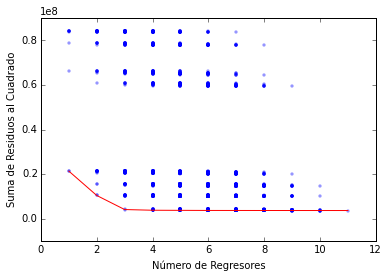

In [82]:
# Ya tenemos todos los modelos:
# Hagamos un gráfico:
plt.scatter(res_arr.k,res_arr.SSR, s=6, color='b',alpha=0.3)
plt.ylabel('Suma de Residuos al Cuadrado')
plt.xlabel(u'Número de Regresores')
# Encontremos la frontera: como en el libro:
front_ssr = res_arr.SSR.groupby(res_arr.k).min()
plt.plot(front_ssr.index, front_ssr.values, color='r')                          

# ¿Qué variables están incluidas en los mejores modelos?

* Rating

* Ingreso

* Límite de Crédito

* Número de tarjetas

* Dummy Estudiante

In [85]:
# Teníamos unos índices equivocados.  Vamos a hacerlo de 0 a M (M es el número total de modelos o combinaciones)
SubSets.set_index(np.arange(SubSets.shape[0]), inplace=True)
# Get the regressors that were selected:
ind_best = np.in1d(res_arr.SSR.values,front_ssr.values)
# teniendo los índices podemos encontrar: los 10 mejores
ind_best = res_arr.index[ind_best]
ind_subset = np.in1d(SubSets.index,ind_best)
SubSets.ix[ind_best]
for i in range(SubSets.ix[ind_best].shape[0]):
    preind = SubSets.ix[ind_best].iloc[i,:]
    #print preind
    preind = np.asarray(pd.Series(preind).dropna(), dtype='int')
    print labs_x[preind]

['Rating']
['Rating' 'Income']
['Rating' 'Income' 'Estudiante']
['Income' 'Limit' 'Cards' 'Estudiante']
['Rating' 'Income' 'Limit' 'Cards' 'Estudiante']
['Rating' 'Income' 'Limit' 'Cards' 'Age' 'Estudiante']
['Rating' 'Income' 'Limit' 'Cards' 'Age' 'Hombre' 'Estudiante']
['Rating' 'Income' 'Limit' 'Cards' 'Age' 'Hombre' 'Estudiante' 'Caucasian']
['Rating' 'Income' 'Limit' 'Cards' 'Age' 'Hombre' 'Estudiante' 'Casado'
 'Caucasian']
['Rating' 'Income' 'Limit' 'Cards' 'Age' 'Education' 'Hombre' 'Estudiante'
 'Casado' 'Caucasian']
['Rating' 'Income' 'Limit' 'Cards' 'Age' 'Education' 'Hombre' 'Estudiante'
 'Casado' 'Caucasian' 'Asian']


# Cómo seleccionamos el mejor modelo?

* Una vez tenemos la frontera, podemos utilizar cuatro opciones para seleccionar:

    1. **Cross-Validation**: minimizar el SSR promedio.
    
    2. Minimizar el Criterio de Información de Akaike:
    $$
    AIC = \frac{1}{n}(RSS + 2d \hat{\sigma}_2)
    $$
    3. Minimizar el Criterio de Información de Bayesiano:
    $$
    BIC = \frac{1}{n}(RSS + \ln(n)d \hat{\sigma}_2)
    $$
    4. Maximizar el $\overline{R}^2$
    
* La ventaja de los últimos tres criterios es que no necesitamos utilizar muestras de validación: los criterios penalizan el uso indebido de regresores adicionales.

# 1. Seleccionando el mejor modelo: Cross-Validation

* El proceso de validación cruzada es simple:

    1. Tenemos identificados los mejores 9 modelos, i.e. los modelos sobre la frontera roja en el gráfico de arriba.
        
        * Cada modelo $\mathcal{M}_k$, identifica la mejor combinación de $k$ regresores en términos de SSR.        
        
    2. Vamos a hacer 10-fold CV: 
        * Dividimos la muestra en 10 grupos iguales.
        * Vamos a iterar el proceso haciendo un loop sobre $1,2,\cdots,10$, donde en cada iteración $g$, la muestra de entrenamiento excluye al grupo $g$, que es utilizado como grupo de validación.
        * Para cada modelo $\mathcal{M}_k$, estimamos los coeficientes de OLS utilizando los 9 grupos de entrenamiento correspondientes.
        * Con estos coeficientes, obtenemos el `SSR` de la muestra de validación correspondiente y lo guardamos.
        * Así, terminamos con una matriz de tamaño $10 \times 10$, donde las filas denotan el modelo, el grupo excluído en la muestra de entrenamiento.
        
* **En la tarea voy a dejar que lo programen ustedes mismos**   

![caption](figures/credit_10fcv.png)


# Miremos los resultados con otros dos criterios: $BIC$ y $\bar{R}^2$
![caption](figures/bicr2bar.png)

# Forward Stepwise Selection


* *Best Subset Selection* es intensivo en poder computacional: necesitamos estimar modelos para **todas** las combinaciones de regresores.

* En el ejemplo anterior, con sólo 10 regresores tuvimos que hacer 2047 estimaciones.

* Una alternativa más eficiente consiste en utilizar un método *bottom-up*:

    * Empezamos con el modelo con una constante.
    
    * Vamos incluyendo regresores de manera iterativa.
    
        * El criterio es seleccionar el regresor que minimiza el SSR en esa iteración.
    
    * Para seleccionar el mejor modelo *global* (tenemos tantos modelos como regresores) utilizamos CV o cualquiera de los otros criterios de selección vistos anteriormente.
    

In [89]:
# forward step-wise selection
# inicialicemos la iteración con una constante
xmat_fss = np.ones((N,1))
# primera iteración: tenemos que seleccionar P modelos
nvar = prexmat.shape[1]
SSRfss = np.zeros((nvar,2))
# una lista donde vamos a guardar los regresores:
reg_opt = []
for k in range(nvar):
    # para cada modelo tenemos que iterar sobre los regresores que quedan:
    # seleccionemos los que quedan:
    ind_quedan = np.setdiff1d(np.arange(nvar),np.array(reg_opt))
    # estamos listos para seleccionar el mejor modelo
    nvar_quedan = ind_quedan.shape[0]
    SSRmat = np.zeros((nvar_quedan,2))
    counter = 0
    for p in ind_quedan:
        # tenemos que utilizar los X previamente seleccionados
        newx = np.concatenate((xmat_fss, prexmat[:,p].reshape((N,1))),axis=1)
        # podemos estimar:
        olsp = ols.ols_dan(saldo,newx)
        SSRmat[counter,:] = [p,olsp.ssr()[0,0]]
        counter +=1
    # terminamos el loop
    # tenemos que seleccionar el regresor actual que minimiza SSRMat
    row_min = np.argmin(SSRmat[:,1],axis=0)
    ssr_min = SSRmat[row_min,1]
    var_min = SSRmat[row_min,0]
    # guardemos esta información
    SSRfss[k,:] = [var_min,ssr_min]
    # finalmente, actualicemos la matriz
    xmat_fss = np.concatenate((xmat_fss,prexmat[:,var_min].reshape((N,1))),axis=1)
    reg_opt.append(int(var_min))

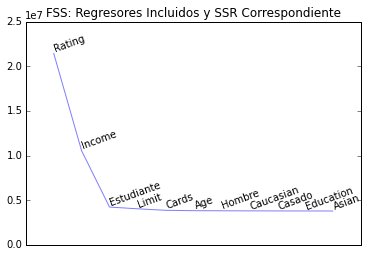

In [96]:
plt.plot(np.arange(1,12), SSRfss[:,1], color='b',alpha=0.5)
for p in range(11):
    plt.text(p+1,SSRfss[p,1],labs_x[int(SSRfss[p,0])], rotation=20,
                verticalalignment='bottom', horizontalalignment='left')
# los ticks en x no dicen nada ahora que incluimos las ettiquetas
plt.xticks([])
plt.title('FSS: Regresores Incluidos y SSR Correspondiente')
plt.show()


# Backward Stepwise Selection

* Este método es parecido, pero opera de arriba hacia abajo o *top-down*


* Empezamos con un modelo que incluye **todos** los regresores.


* Vamos excluyendo regresores así:

    * En cada iteración nos quedan $k$ regresores.
    
    * Seleccionamos el modelo con $k-1$ regresores (excluyendo una variable) que tiene el menor SSR.
    

* De los $P$ modelos posibles, seleccionamos el mejor modelo global con CV o cualquiera de los otros métodos.

![caption](figures/bss_credit.png)

# Componentes Principales (PCA):

* Una alternativa bastante utilizada en econometría es seleccionar sólo un subconjunto de *combinaciones lineales* de los regresores, y en particular, aquella que tenga un poder de síntesis sobre la matrix $X$ completa lo suficientemente grande.


* En series de tiempo, por ejemplo, cuando tenemos numerosas variables endógenas en un VAR, es fácil agotar los grados de libertad rápidamente si intentamos incluir una dinámica flexible, es decir, un orden de autoregresión que incluya $2,3,4,5, etc.$ rezagos de *todas* las variables endógenas.


* Ver por ejemplo la literatura sobre **Factor Augmented Vector Autoregressive Regression (FAVAR)**.
  
  
* La pregunta que queremos responder es simple:

    > ¿Dada la matriz $X_{N \times {p+1}}$, podemos reducir la dimensionalidad de $X$ sin perder poder explicativo?


* A diferencia de los métodos anteriores donde la *reducción de dimensionalidad* se obtiene *excluyendo* regresores, en PCA se obtiene mediante una selección inteligente de combinaciones lineales de los regresores.


* Así, la primera combinación lineal que utilicemos será la que explique un mayor porcentaje de la varianza de $X$, la siguiente la que explique el segundo mayor porcentaje de la varianza de $X$, y así sucesivamente.

# Componentes Principales (cont):

* Antes de empezar, es común, **centrar** la matriz de regresores, así que, abusando un poco de la notación, sea $X$ una matriz de tamaño $N \times p$, donde cada regresor $x_k$ ha sido centrado, es decir, $x_k- \overline{x}_k$.

    * Por esto excluimos la constante.
    
    
* La intuición de los componentes principales se puede obtener muy rápidamente así.


* Supongamos que tenemos $p$  variables aleatorias.

    * Nota 1: la matriz $X$ centrada, recoge las $N$ realizaciones de estas variables aleatorias.
    
    * Nota 2: $N^{-1}X'X$ es la matriz de covarianzas muestral, contraparte de $\Sigma$.
    

* Nuestro objetivo es encontrar un vector $\alpha_j = [\alpha_{1j}, \alpha_{2j}, \cdots, \alpha_{pj}]$ tal que 
$$
\sum_{k=1}^p \alpha_{kj} x_{kj} = \mathbf{\alpha}_j' x
$$

tenga la *mayor varianza posible*.

* Como 

$$
Var(\mathbf{\alpha}_j' x) = \mathbf{\alpha}_j' \mathbf{\Sigma} \mathbf{\alpha}_j
$$

sabemos que podemos elegir $\mathbf{\alpha}_j$ cada vez más grande, así que el problema está indeterminado, a menos que impongamos una normalización: $\mathbf{\alpha}_j'\mathbf{\alpha}_j = 1$.

# Componentes Principales (cont.)


* Así, el problema de optimización que queremos resolver es:

$$
max_{\mathbf{\alpha}_j} \hspace{2mm} \mathcal{L} = \mathbf{\alpha}_j' \mathbf{\Sigma} \mathbf{\alpha}_j - \lambda(\mathbf{\alpha}_j'\mathbf{\alpha}_j - 1)
$$

* Diferenciando, tenemos las condiciones de primer orden:

$$
\begin{eqnarray*}
\mathbf{\Sigma} \mathbf{\alpha}_j &=& \lambda \mathbf{\alpha}_j \\
\mathbf{\alpha}_j'\mathbf{\alpha}_j &=& 1
\end{eqnarray*}
$$

así que podemos reconocer que $\mathbf{\alpha}_j$ es un **vector propio de $\Sigma$**, y $\lambda$ el valor propio correspondiente.


* Pero cuál vector propio?


* Queremos maximizar 
$$
\mathbf{\alpha}_j' \mathbf{\Sigma} \mathbf{\alpha}_j = \mathbf{\alpha}_j' \lambda \mathbf{\alpha}_j = \lambda \mathbf{\alpha}_j' \mathbf{\alpha}_j
$$ 
(¿por qué?)

así que la selección es simple: queremos el vector propio $\mathbf{\alpha}_j$ que corresponda al **mayor** valor propio $\lambda$.


* Este es el **primer componente principal**: $x'\mathbf{\alpha}_j$


* Se puede demostrar que el segundo componente principal es la proyección de $X$ utilizando el vector propio correspondiente al segundo mayor valor propio, y así sucesivamente.


* Así, los componentes principales se obtienen como el producto de $XV$, donde $V$ es la matriz que tiene los vectores propios correspondientes.

# Resumen del procedimiento:

1. Centrar la matriz $X$.

2. Obtener los primeros $k$ vectores propios de $X'X$, $k \in  \{1,2,\cdots, p\}$, con la convención que  $\lambda_1> \lambda_2, \cdots, \lambda_p$:

$$
Z_k = XV_k
$$

3. Hacer una regresión de

$$
y = Z_k \theta + \epsilon
$$

4. Guardar el SSR_k y seleccionar el número óptimo por medio de validación cruzada.

[ -1.41220369e-15   4.79616347e-16]


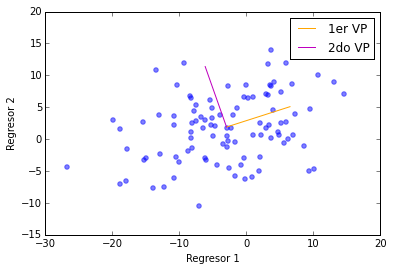

In [50]:
#------------------------------
# Ejemplo con dos regresores:
#------------------------------
# vamos a simular dos regresores correlacionados
np.random.seed(421091725)
N = 100
mu = np.array([-3,2])
W  = np.random.randn(2,2)
DD = np.diag(np.array([10,5]))
Sigma = np.dot(W.T,np.dot(DD,W))
xmat = np.random.multivariate_normal(mu,Sigma,N)

# Paso 1: centrar (usemos broadcasting para facilitar)
xmat_dem = xmat - xmat.mean(axis=0).reshape((1,2))
# probemos que quedó bien hecho
print xmat_dem.mean(axis=0)

# Paso 2: obtengamos los vectores y valores propios
Smat = (1.0/N)*np.dot(xmat_dem.T,xmat_dem)
D, V = np.linalg.eig(Smat)

# Grafiquémoslos
plt.scatter(xmat[:,0],xmat[:,1], color='b', alpha=0.5)
plt.xlabel('Regresor 1')
plt.ylabel('Regresor 2')
x1bar = xmat.mean(axis=0)[0]
x2bar = xmat.mean(axis=0)[1]
newV = 10*V
plt.plot([x1bar,x1bar + newV[0,0]], [x2bar,x2bar + newV[1,0]], color='orange', label='1er VP')
plt.plot([x1bar,x1bar + newV[0,1]], [x2bar,x2bar + newV[1,1]], color='m', label='2do VP')
plt.legend(loc='best')

# Componentes Principales (Cont.):


* Los componentes principales son ortogonales entre sí:

    * Los vectores propios lo son.
    
* El primer componente principal busca la dirección de máxima varianza.

* Para obtener la proporción de la varianza de $X$ explicada por el componente principal $k$:

$$
\frac{\lambda_k}{\sum_j \lambda_j}
$$

2.50111042988e-13


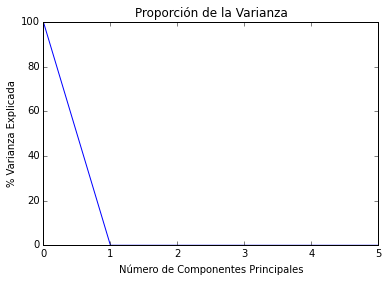

In [144]:
# Volvamos al ejemplo de datos de Crédito
N = data.shape[0]
# Hay dos tipos de variables: continuas y categóricas
prexmat_con = np.concatenate((
                        np.asarray(data.Rating).reshape((N,1)),
                        np.asarray(data.Income).reshape((N,1)),
                         np.asarray(data.Limit).reshape((N,1)),
                         np.asarray(data.Cards).reshape((N,1)),
                         np.asarray(data.Age).reshape((N,1)),
                         np.asarray(data.Education).reshape((N,1)),
                         ),axis=1)
prexmat_cat = np.concatenate((
                          dum_hombre, dum_estudiante, dum_casado, dum_ethnic
                         ),axis=1)
saldo = np.asarray(data.Balance).reshape((N,1))
nvar_con = prexmat_con.shape[1]

# Paso 1: Centrar la matriz de variables continuas
prexmatcon_dem = prexmat_con - np.nanmean(prexmat_con, axis=0).reshape((1,nvar_con))
# check
print prexmatcon_dem.mean(axis=0).max()

# Paso 2: Eigenvalue decomposition
D,V = np.linalg.eig(np.dot(prexmatcon_dem.T, prexmatcon_dem))

# Paso 3: Construcción de los componentes principales:
# Organicémoslos de menor a mayor: NO SIEMPRE LO ESTAN
D = pd.DataFrame(D, columns=['valores_ppios']).sort(columns='valores_ppios', ascending=False)
ind_sorted = D.index
# Componentes principales: con los valores propios ordenados de mayor a menor
Zmat = np.dot(prexmatcon_dem,V[:,ind_sorted])
# Veamos la proporción de las varianzas explicadas por todos
plt.plot((100*D/D.sum()).values)
plt.title(u'Proporción de la Varianza')
plt.xlabel(u'Número de Componentes Principales')
plt.ylabel('% Varianza Explicada')

1     37
2     42
3     49
4     29
5     51
6     31
7     35
8     38
9     49
10    39
dtype: int64


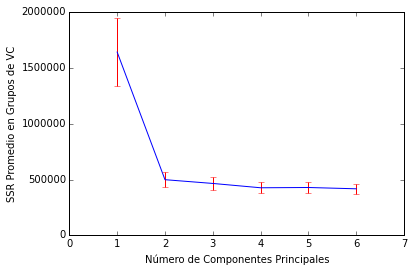

In [148]:
# Vamos a hacer CV con 10 grupos:
grp_cv = 10
ind_grp = np.dot(np.random.multinomial(1,[1.0/grp_cv]*grp_cv, N),np.arange(1,grp_cv+1).reshape(grp_cv,1))
# check:
check = pd.Series(ind_grp.flatten()).groupby(pd.Series(ind_grp.flatten())).count()
print check
# Inicialicemos matriz donde vamos a guardar los resultados:
SSRCP = np.zeros((grp_cv,nvar_con))
# centremos y, así no tenemos que incluir constante
saldo_cen = saldo - np.nanmean(saldo,axis=0)
# loop externo: grupos
for g in np.arange(grp_cv):
    ind_train = (ind_grp!=g+1)
    n_train   = ind_train.sum()
    ind_valid = (ind_grp==g+1)
    n_valid   = ind_valid.sum()
    # asignemos variables:
    yy_train  = saldo_cen[ind_train].reshape((n_train,1))
    yy_valid  = saldo_cen[ind_valid].reshape((n_valid,1))
    zz_train  = Zmat[ind_train.flatten(),:]
    zz_valid  = Zmat[ind_valid.flatten(),:]
    dd_train  = prexmat_cat[ind_train.flatten(),:]
    dd_valid  = prexmat_cat[ind_valid.flatten(),:]
    # loop interno: modelos (número de CP)
    for k in range(nvar_con):
        # Necesitamos incluir variables categóricas y los componentes principales
        fullxmat_train = np.concatenate((zz_train[:,:k+1],dd_train),axis=1)
        fullxmat_valid = np.concatenate((zz_valid[:,:k+1],dd_valid),axis=1)
        full_nvar = fullxmat_valid.shape[1]
        olsk = ols.ols_dan(yy_train,fullxmat_train)
        # necesitamos el SSR evaluado en valid
        yhat_valid = np.dot(fullxmat_valid,olsk.betahat().reshape((full_nvar,1)))
        res_valid  = yy_valid - yhat_valid
        SSRCP[g,k] = np.dot(res_valid.T,res_valid)
        

mean_ssr = pd.DataFrame(SSRCP).mean()
sem_ssr  = pd.DataFrame(SSRCP).sem()
plt.plot(np.arange(1,nvar_con+1), mean_ssr.values)
plt.bar(np.arange(1,nvar_con+1), mean_ssr.values, ec='w', fc='w', align='center',
                    yerr = 1.96*sem_ssr.values, ecolor='r')
plt.xlabel(u'Número de Componentes Principales')
plt.ylabel(u'SSR Promedio en Grupos de VC')

# Descomposición con Valores Singulares

* Una matriz $Z_{N \times p}$ se puede descomponer en el producto de tres matrices:

$$
Z = U_{N \times p} D_{p \times p} V'_{p \times p}
$$

Las matrices $U, V$ son ortogonales: $UU'= U'U = I_{N}$, $VV'= V'V = I_{p}$, y $D$ sólo tiene entradas no nulas en la diagonal.

* Se puede demostrar que:

    1. Las columnas de $U$ son los vectores propios de $ZZ'$.
    2. Las columnas de $V$ son los vectores propios de $Z'Z$.
    3. Los valores singulares distintos de cero $d_{ii}$ son las raíces cuadradas de los valores propios no nulos de $Z'Z$ y $ZZ'$.
    

* En regresión lineal, por ejemplo, esta transformación nos lleva a **la regresión por componentes principales**.

$$
\begin{eqnarray*}
y &=& X\beta + \epsilon \\
&=& (UDV')\beta + \epsilon \\
&=& U(DV'\beta) + \epsilon \\
&=& U\alpha  + \epsilon \\
\end{eqnarray*}
$$

* Así, $\hat{\alpha} = (UU')^{-1}U'y = U'y$, así que no tenemos que invertir ninguna matriz.

* El $y$ estimado es: $X\hat{beta} = X(X'X)^{-1}X'y = $

# Ridge Regression

* Excluyendo la regresión por componentes principales, los métodos anteriores son discontinuos o *sparse*, en el sentido que de los $P$ regresores, sólo excluimos una parte de ellos.
    
    * Los coeficientes $\hat{\beta}_k$ son cero o distintos de cero.
    
* Tiene la ventaja que facilita la interpretación.

* Pero las predicciones pueden tener mucha varianza: incluimos o excluimos regresores.

* Una alternativa es buscar un procedimiento más *suave*, en donde minimicemos el valor absoluto de los coeficientes, sin llevarlos a cero.

* Esto se puede plantear fácilmente en un modelo de optimización donde penalizamos los coeficientes grandes.

$$
\beta_{ridge} = argmin_{\beta} (y - X\beta)'(y - X\beta) + \lambda \beta'\beta
$$

* Derivando, se puede ver que la solución a este problema es:

$$
\beta_{ridge} = (X'X + \lambda I)^{-1}X'y
$$

* **Nota**: **estas fórmulas asumen que el modelo se ha estandarizado, es decir, todas las variables, $y$ ha sido centrada y $x$ estandarizadas, así que excluimos la constante de la estimación.** 